# Wine Quality Prediction

- This dataset focuses on the red variants of Portuguese "Vinho Verde" wine.
- **Goal:** Predict the quality of the wine.
- [Dataset for this project on Kaggle](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)
- [YouTube Video](https://youtu.be/CBxJuwrGrc4?list=PLfFghEzKVmjvuSA67LszN1dZ-Dd_pkus6)

# Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine_data = pd.read_csv('./winequality-red.csv')

In [3]:
wine_data.shape
wine_data.head()
wine_data.describe()

(1599, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# EDA

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

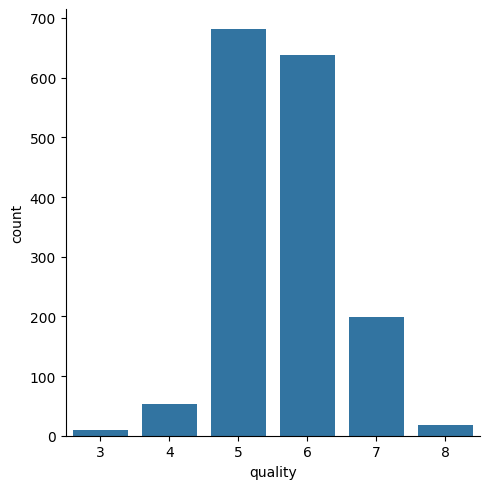

In [5]:
wine_data['quality'].value_counts()
sns.catplot(x='quality', kind='count', data=wine_data)

# Features vs quality plot

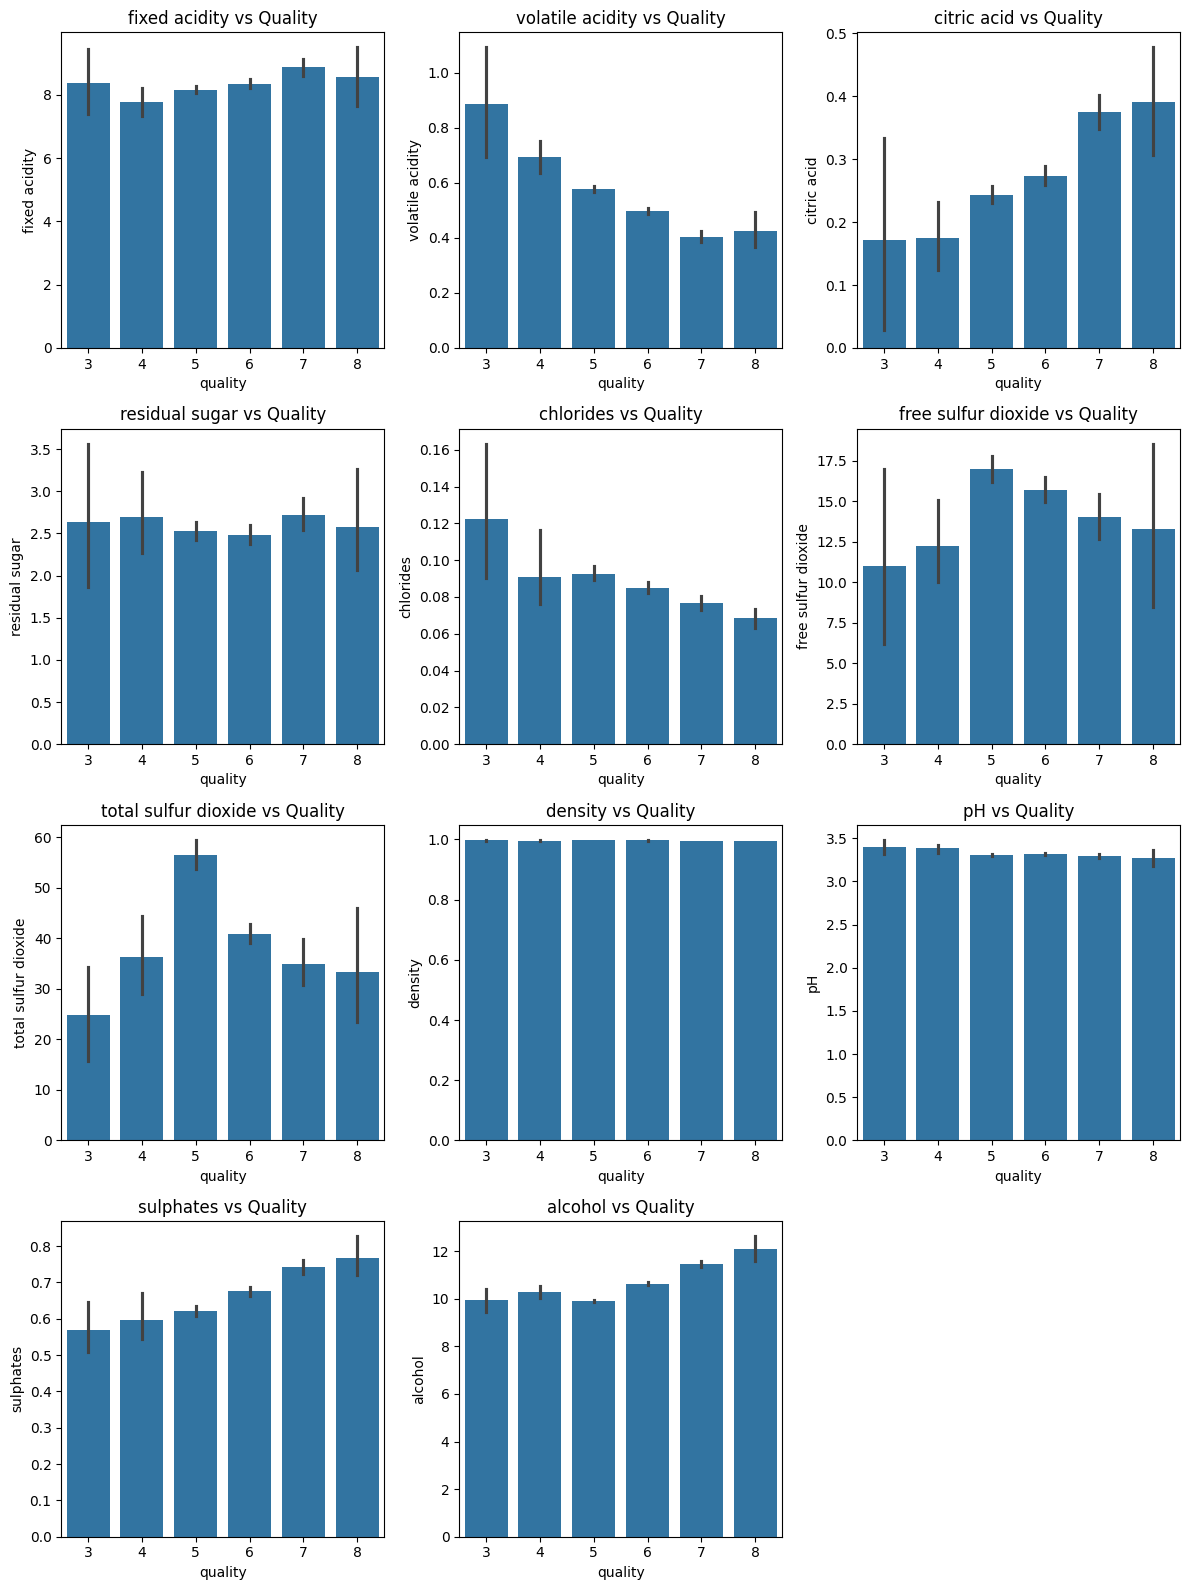

In [13]:
features_to_plot = wine_data.columns[:-1]

# Calculate the number of rows and columns for the grid
num_features = len(features_to_plot)
num_cols = 3  # You can adjust the number of columns based on your preference
# Ceiling division to ensure enough rows
num_rows = -(-num_features // num_cols)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols,
                         figsize=(12, 4 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a bar plot
for i, feature in enumerate(features_to_plot):
    _ = sns.barplot(x='quality', y=feature, data=wine_data, ax=axes[i])
    _ = axes[i].set_title(f'{feature} vs Quality')

# Remove any empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])
    pass

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Correlations heat map

In [28]:
wine_data_corr = wine_data.corr()

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Correlations heat map')

<Axes: title={'center': 'Correlations heat map'}>

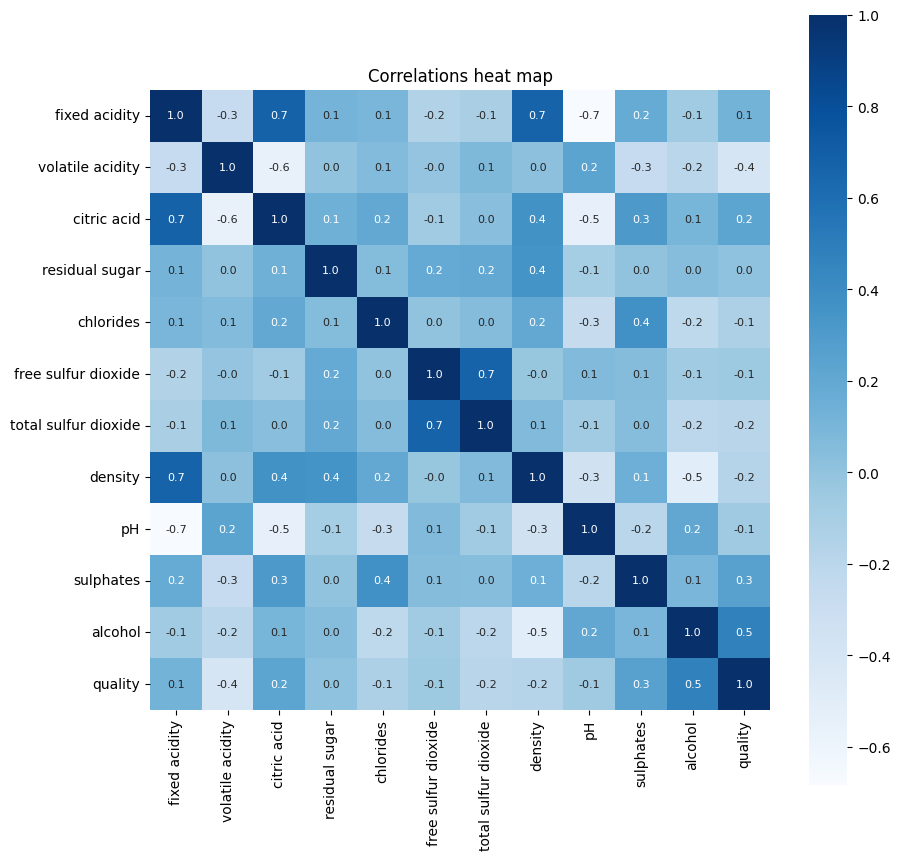

In [29]:
plt.figure(figsize=(10, 10))
plt.title('Correlations heat map')
sns.heatmap(wine_data_corr, cbar=True, cmap='Blues', fmt='.1f',
            square=True, annot=True, annot_kws=dict(size=8))

<Figure size 800x400 with 0 Axes>

<Axes: >

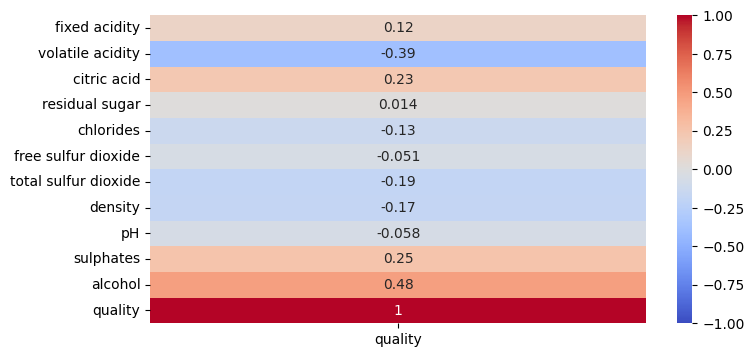

In [30]:
plt.figure(figsize=(8, 4))
sns.heatmap(wine_data_corr[['quality']],
            cmap='coolwarm', annot=True, vmin=-1)

In [32]:
wine_data_corr[(wine_data_corr['quality'] > .25) |
               (wine_data_corr['quality'] < -.25)]['quality']

volatile acidity   -0.390558
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64